In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

### Functions

In [2]:
def get_energy_data(data, time, maxslices, nref, dt, noise, step, e_level, num_runs):
    runs = np.linspace(1, num_runs, num_runs, dtype = int)
    energies = []
    filepath = "/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/%s/%s/data/"%(data,time)
    for run in runs:
        i = int(run)-1
        filename = "%s_%s_%s_%s_%s_%s_%s.dat"%(data,time,str(maxslices),str(nref),str(dt),str(noise),str(run))
        file = os.path.join(filepath, filename)
        with open(file) as f:
            lines = f.readlines()
            line = lines[step + e_level]
            line = line.split()
            energies.append(line[e_level + 1])

    energies = np.array(energies)
    energies = energies.astype(np.float)
    return energies

def average_energies(energies,num_runs):
    avg_energies = np.mean(energies[0:num_runs-1])
        
    return avg_energies

def std_dev(energies,avg_energies,num_runs):
    num_runs_array = np.linspace(1,num_runs,num_runs, dtype = int)
    sum = 0
    for run in num_runs_array:
        sum = sum + (energies[run-1] - avg_energies)**2
    error = np.sqrt(sum/num_runs)
    sum = 0
        
    return error

def plot(data,time,nref,tau0,dt,noise,maxtimes,results,std_errors,exact,hf):
    plt.errorbar(maxtimes,results,std_errors,marker='o',capsize=5)
    plt.xlabel('k')
    plt.ylabel('Energy (MeV)')
    plt.rcParams['figure.figsize'] = [12.5, 10]
    plt.axhline(y=hf, color='b', linestyle='-')
    plt.axhline(y=exact, color='r', linestyle='-')
    if time=="im":
        plt.legend(['HF Energy', 'Exact Energy', 'ITE'], loc='upper right', numpoints=1)
    elif time=="re":
        plt.legend(['HF Energy', 'Exact Energy', 'RTE'], loc='upper right', numpoints=1)
    

### Hartree-Fock Energies

In [3]:
ne20_hf = -36.404
na22_hf = -54.653
na29_hf = -104.784

### Exact Energies

In [4]:
ne20_exact = [-40.47233,-38.72564,-36.29706,-33.77415,-32.92937]
na22_exact = [-58.44285,-58.10455,-57.57816,-57.48698,-56.90493]
na29_exact = [-107.06200,-106.99092,-105.01745,-104.90842,-104.31960]

###  Comparing # of Ref States

In [512]:
# Inputs parameters
data = "ne29"   # data set to use ("ne20", "na22", or "na29")
time = "re"     # time evolution ("re" or "im")
e_level = 0     # energy level
dt = 0.1       # time step size
noise = 1       # added noise (percent)
num_runs = 100  # num of runs
cnvg_pct = 5    # select % to converge to
maxslices = 20  # how many steps to evolve

#### Do not change anything under this line ####
if data=="ne20":
    tau0 = 0.194
    hf = ne20_hf
    exact = ne20_exact[e_level]
elif data=="na22":
    tau0 = 0.238
    hf = na22_hf
    exact = na22_exact[e_level]
elif data=="na29":
    tau0 =  0.336
    hf = na29_hf
    exact = na29_exact[e_level]
else:
    sys.exit("Invalid data input.")
    
if e_level==0:
    tol = cnvg_pct/100*(hf-exact)
else:
    tol = 0.2
    
if time=="im":
    script="laQMCdemo.sh"
elif time=="re":
    script="claQMCdemo.sh"
else:
    sys.exit("Invalid time input.")


In [513]:
# 1 Reference state
nref = 1

!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1

energies_1 = []
avg_energies_1 = []
error_1 = []

# Run code until it converges
diff = 100
step = 0
while diff >= tol:
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    diff = avg_energies_step-exact
    step += 1
    energies_1.append(energies_step)
    avg_energies_1.append(avg_energies_step)
    error_1.append(error_step)
    
energies_1 = np.concatenate(energies_1)
avg_energies_1 = np.stack(avg_energies_1, axis=0)
error_1 = np.stack(error_1, axis=0)

k_1 = np.linspace(e_level, step-1, step, dtype = float, endpoint=True)
S1 = step+e_level-1

#plot(data,time,nref,tau0,dt,noise,k_1,avg_energies_1[0:len(k_1)],error_1[0:len(k_1)],exact,hf)

D1 = nref*(S1+1)
D1


16

In [501]:
# 2 Reference states
nref = 2
maxslices = S1
#maxslices = 105
!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1

energies_2 = []
avg_energies_2 = []
error_2 = []

# Run code until it converges
diff = 100
step = 0
while diff >= tol:
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    diff = avg_energies_step-exact
    step += 1
    energies_2.append(energies_step)
    avg_energies_2.append(avg_energies_step)
    error_2.append(error_step)
    
energies_2 = np.concatenate(energies_2)
avg_energies_2 = np.stack(avg_energies_2, axis=0)
error_2 = np.stack(error_2, axis=0)

k_2 = np.linspace(e_level, step-1, step, dtype = float, endpoint=True)
S2 = step+e_level-1

#plot(data,time,nref,tau0,dt,noise,k_2,avg_energies_2[0:len(k_2)],error_2[0:len(k_2)],exact,hf)

D2 = nref*(S2+1)
D2


24

In [502]:
# 3 Reference states
nref = 3
maxslices = S2
#maxslices = 70
!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1

energies_3 = []
avg_energies_3 = []
error_3 = []

# Run code until it converges
diff = 100
step = 0
while diff >= tol:
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    diff = avg_energies_step-exact
    step += 1
    energies_3.append(energies_step)
    avg_energies_3.append(avg_energies_step)
    error_3.append(error_step)
    
energies_3 = np.concatenate(energies_3)
avg_energies_3 = np.stack(avg_energies_3, axis=0)
error_3 = np.stack(error_3, axis=0)

k_3 = np.linspace(e_level, step-1, step, dtype = float, endpoint=True)
S3 = step+e_level-1

#plot(data,time,nref,tau0,dt,noise,k_3,avg_energies_3[0:len(k_3)],error_3[0:len(k_3)],exact,hf)

D3 = nref*(S3+1)
D3


33

In [ ]:
# 4 Reference states
nref = 4
maxslices = S3
#maxslices = 44
!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1

energies_4 = []
avg_energies_4 = []
error_4 = []

# Run code until it converges
diff = 100
step = 0
while diff >= tol:
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    diff = avg_energies_step-exact
    step += 1
    energies_4.append(energies_step)
    avg_energies_4.append(avg_energies_step)
    error_4.append(error_step)
    
energies_4 = np.concatenate(energies_4)
avg_energies_4 = np.stack(avg_energies_4, axis=0)
error_4 = np.stack(error_4, axis=0)

k_4 = np.linspace(e_level, step-1, step, dtype = float, endpoint=True)
S4 = step+e_level-1

#plot(data,time,nref,tau0,dt,noise,k_4,avg_energies_4[0:len(k_4)],error_4[0:len(k_4)],exact,hf)

D4 = nref*(S4+1)
D4


In [443]:
# 5 Reference states
nref = 5
maxslices = S4
#maxslices = 17
!bash /Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/$script -i $num_runs -d $data -t $time -m $maxslices -r $nref -p $tau0 -s $dt -n $noise >/dev/null 2>&1

energies_5 = []
avg_energies_5 = []
error_5 = []

# Run code until it converges
diff = 100
step = 0
while diff >= tol:
    energies_step = get_energy_data(data,time,maxslices,nref,dt,noise,step,e_level,num_runs)
    avg_energies_step = average_energies(energies_step,num_runs)
    error_step = std_dev(energies_step,avg_energies_step,num_runs)
    diff = avg_energies_step-exact
    step += 1
    energies_5.append(energies_step)
    avg_energies_5.append(avg_energies_step)
    error_5.append(error_step)
    
energies_5 = np.concatenate(energies_5)
avg_energies_5 = np.stack(avg_energies_5, axis=0)
error_5 = np.stack(error_5, axis=0)

k_5 = np.linspace(e_level, step-1, step, dtype = float, endpoint=True)
S5 = step+e_level-1

#plot(data,time,nref,tau0,dt,noise,k_5,avg_energies_5[0:len(k_5)],error_5[0:len(k_5)],exact,hf)

D5 = nref*(S5+1)
D5


^C


IndexError: list index out of range

In [ ]:
D1, D2, D3, D4, D5

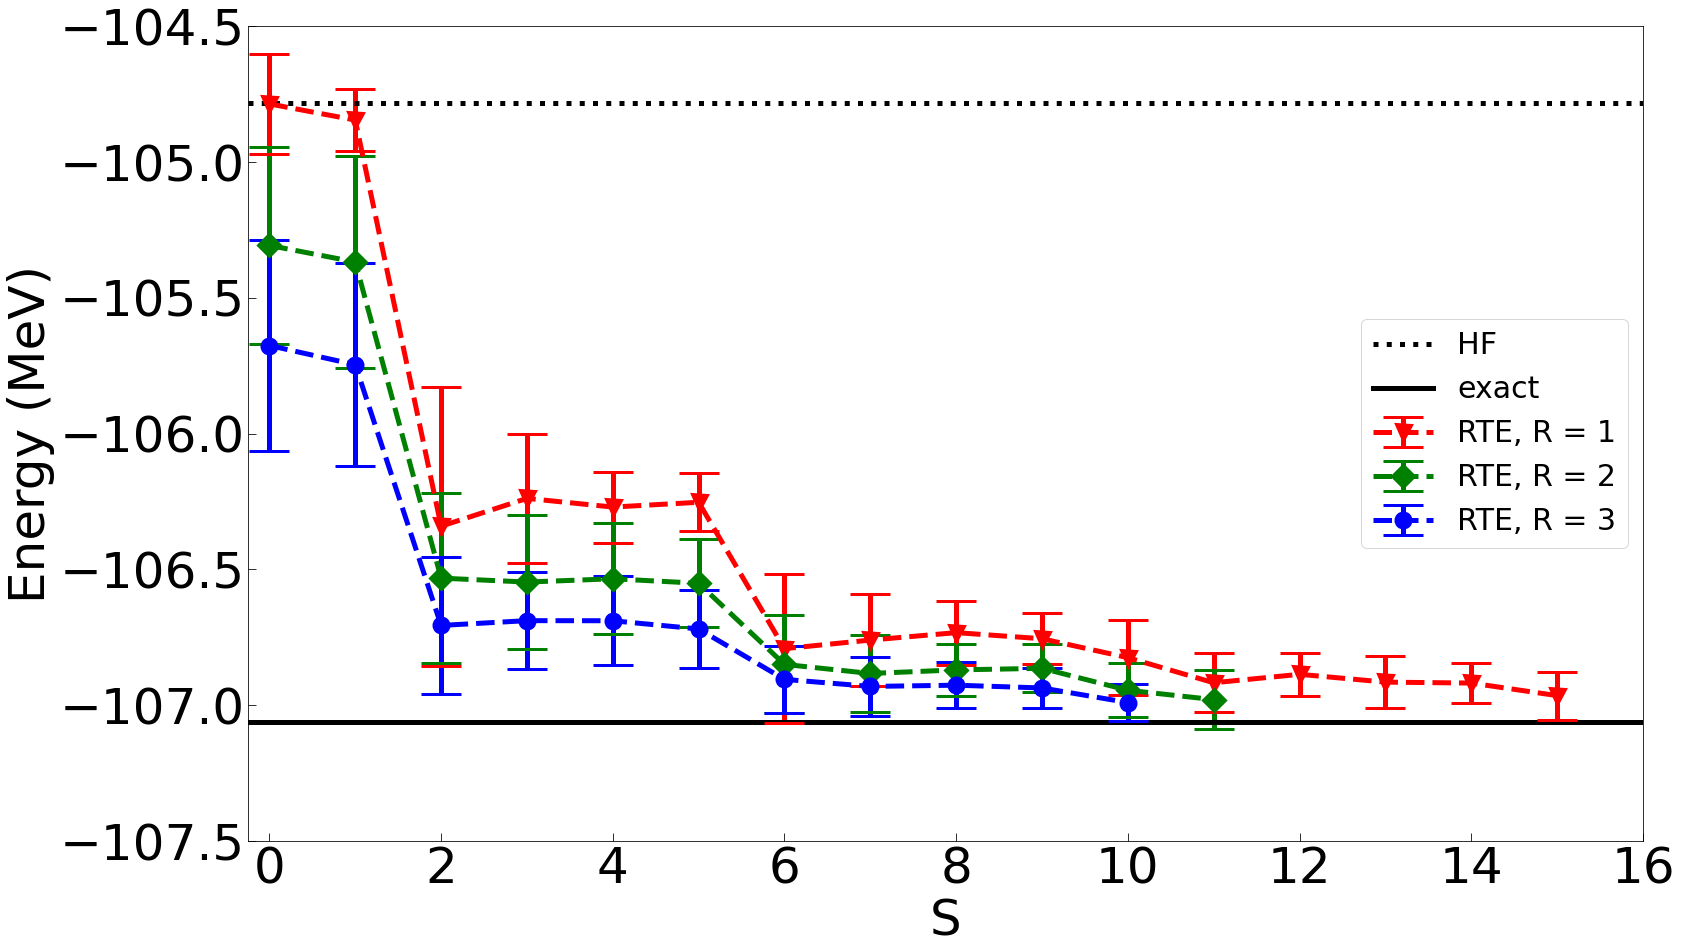

In [507]:
#Compare
ax = plt.subplot(111)  
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
ax.spines["bottom"].set_visible(True)  
ax.spines["left"].set_visible(True)
plt.rcParams.update({'font.size': 50})
ax.tick_params(direction='in', length=8)

plt.axhline(y=hf, color='k', linestyle='dotted',linewidth=5)
plt.axhline(y=exact, color='k', linestyle='-',linewidth=5)

#plt.plot(k_1,avg_energies_1[0:len(k_1)],marker='v',linestyle='dashed',color='r',linewidth=3,markersize=15,markeredgewidth=3)
#plt.plot(k_2,avg_energies_2[0:len(k_2)],marker='D',linestyle='dashed',color='g',linewidth=3,markersize=15,markeredgewidth=3)
#plt.plot(k_3,avg_energies_3[0:len(k_3)],marker='o',linestyle='dashed',color='b',linewidth=3,markersize=15,markeredgewidth=3)
#plt.plot(k_4,avg_energies_4[0:len(k_4)],marker='s',linestyle='dashed',color='m',linewidth=3,markersize=15,markeredgewidth=3)
#plt.plot(k_5,avg_energies_5[0:len(k_5)],marker='p',linestyle='dashed',color='darkorange',linewidth=3,markersize=15,markeredgewidth=3)

plt.errorbar(k_1,avg_energies_1[0:len(k_1)],error_1[0:len(k_1)],marker='v',linestyle='dashed',color='r',linewidth=5,markersize=15,capsize=20,markeredgewidth=3)
plt.errorbar(k_2,avg_energies_2[0:len(k_2)],error_2[0:len(k_2)],marker='D',linestyle='dashed',color='g',linewidth=5,markersize=15,capsize=20,markeredgewidth=3)
plt.errorbar(k_3,avg_energies_3[0:len(k_3)],error_3[0:len(k_3)],marker='o',linestyle='dashed',color='b',linewidth=5,markersize=15,capsize=20,markeredgewidth=3)
#plt.errorbar(k_4,avg_energies_4[0:len(k_4)],error_4[0:len(k_4)],marker='s',linestyle='dashed',color='m',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)
#plt.errorbar(k_5,avg_energies_5[0:len(k_5)],error_5[0:len(k_5)],marker='p',linestyle='dashed',color='darkorange',linewidth=3,markersize=12,capsize=12,markeredgewidth=3)

plt.xlabel('S')
plt.ylabel('Energy (MeV)')

if data == "ne20":
    #plt.xlim([-0.125,6])
    #ax.set_xticks([2,4,6,8,10,12])
    plt.ylim([-41, -36])
    #ax.set_yticks([-104,-105,-106,-107,-108])
elif data == "na22":
    plt.xlim([-0.5,40])
    #ax.set_xticks([2,4,6,8,10,12])
    plt.ylim([-59, -54])
    #ax.set_yticks([-104,-105,-106,-107,-108])
elif data == "na29":
    plt.xlim([-0.25,16])
    #ax.set_xticks([0,1,2,3,4,5])
    plt.ylim([-107.5, -104.5])
    #ax.set_yticks([-104,-105,-106,-107,-108])

plt.rcParams['figure.figsize'] = [25, 15]

#plt.legend(['HF', 'exact','RTE, R = 1', 'RTE, R = 2', 'RTE, R = 3', 'RTE, R = 4', 'RTE, R = 5'], loc='center right', fontsize=30)
plt.legend(['HF', 'exact','RTE, R = 1', 'RTE, R = 2', 'RTE, R = 3'], loc='center right', fontsize=30)

plt.savefig('/Users/Mandy/Desktop/sdsu_stuff/research/lanczos/Johnson_code/%s/plots/cmprnref_%s_%s_%selevel_%sdt_%snoise.png'%(data,data,time,str(e_level),str(dt),str(noise)), facecolor='white', edgecolor='none', dpi=300, bbox_inches='tight')
    

In [463]:
k_1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])